In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date,datetime
from functools import reduce
%matplotlib inline

In [2]:
df = pd.read_csv('carpetas-de-investigacion-pgj-cdmx(1).csv',sep=';')

In [3]:
df.shape

(808871, 18)

In [5]:
df[['delito','categoria_delito','colonia_hechos',
    'fecha_hechos','alcaldia_hechos','longitud','latitud']].to_excel('delitos.xlsx',index=False)

In [4]:
df.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2018.0,Abril,2018-04-13 13:30:00,ROBO DE DOCUMENTOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-2SD,POLANCO,MIGUEL HIDALGO,2018-04-16 11:23:30,Abril,2018,MOLIERE,NaN,-99.201358,19.436043,"19.4360428522,-99.201358159"
1,2016.0,Agosto,2016-08-05 16:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN TLALPAN,TLP-4,UI-1CD,PLAZA COAPA,TLALPAN,2016-08-08 10:26:57,Agosto,2016,AVENIDA CANAL DE MIRAMONTES,NaN,-99.125250,19.295906,"19.2959060463,-99.1252499799"
2,2015.0,Octubre,2015-10-23 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,JUZGADOS CIVILES,74,UI-1SD,DOCTORES,CUAUHTEMOC,2016-03-28 14:26:39,Marzo,2016,AV. NIÑOS HEROES,JUZGADO 8o. DE LO CIVIL DEL D.F.,-99.150120,19.421230,"19.4212299998,-99.15012"
3,2016.0,Marzo,2016-03-28 09:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",59,UI-3CD,AMPLIACIÓN CARACOL,VENUSTIANO CARRANZA,2016-03-28 14:35:05,Marzo,2016,GRAL. FRANCISCO MURGUIA,NaN,-99.066132,19.428401,"19.4284009998,-99.066132"
4,2016.0,Enero,2016-01-06 11:30:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2016-01-06 14:02:39,Enero,2016,RAIZ DE AGUA.,CANAL DE APATLACO,-99.105054,19.382267,"19.3822669998,-99.105054"


In [5]:
df.categoria_delito.value_counts(normalize=True)

DELITO DE BAJO IMPACTO                                     0.783624
HECHO NO DELICTIVO                                         0.065662
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                       0.052788
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA       0.041450
ROBO A NEGOCIO CON VIOLENCIA                               0.014314
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                      0.009082
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO              0.008475
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA      0.006796
HOMICIDIO DOLOSO                                           0.005621
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA    0.003563
VIOLACIÓN                                                  0.003013
ROBO A CASA HABITACIÓN CON VIOLENCIA                       0.002274
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA    0.001751
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA              0.000914
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA        

In [6]:
df = df.loc[df.categoria_delito!='DELITO DE BAJO IMPACTO']

In [7]:
df = df.loc[df.categoria_delito!='HECHO NO DELICTIVO']

In [8]:
df.categoria_delito.value_counts(normalize=True)

ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                       0.350256
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA       0.275027
ROBO A NEGOCIO CON VIOLENCIA                               0.094973
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                      0.060259
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO              0.056231
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA      0.045091
HOMICIDIO DOLOSO                                           0.037299
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA    0.023641
VIOLACIÓN                                                  0.019990
ROBO A CASA HABITACIÓN CON VIOLENCIA                       0.015085
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA    0.011615
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA              0.006062
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                   0.003700
SECUESTRO                                                  0.000771
Name: categoria_delito, dtype: float64

In [9]:
df = df.loc[df.categoria_delito=='ROBO DE VEHÍCULO CON Y SIN VIOLENCIA']

In [10]:
df = df.loc[df['delito'].isin(list(df.delito.value_counts(normalize=True).index)[:4])]

In [11]:
df.shape

(36199, 18)

In [12]:
df.reset_index(drop=True,inplace=True)

In [13]:
df = df[['fecha_hechos','delito','colonia_hechos','alcaldia_hechos','longitud','latitud']]

In [14]:
df.head()

,fecha_hechos,delito,colonia_hechos,alcaldia_hechos,longitud,latitud
0,2016-03-26 21:30:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,AGRÍCOLA ORIENTAL,IZTACALCO,-99.073706,19.395480
1,2018-04-25 00:30:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,PRADO COAPA 3A SECCIÓN,TLALPAN,-99.130807,19.290864
2,2016-01-16 15:55:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,DEL CARMEN,COYOACAN,-99.168867,19.357092
3,2017-12-25 23:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,EL TANQUE,LA MAGDALENA CONTRERAS,-99.249524,19.322978
4,2017-12-30 19:30:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,GUERRERO,CUAUHTEMOC,-99.138678,19.448831


In [15]:
l_al = list(df.alcaldia_hechos.value_counts(normalize=True).index)[:5]

In [16]:
df = df.loc[df.alcaldia_hechos.isin(l_al)]

In [17]:
df.reset_index(drop=True,inplace=True)

In [18]:
df.head()

,fecha_hechos,delito,colonia_hechos,alcaldia_hechos,longitud,latitud
0,2016-01-16 15:55:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,DEL CARMEN,COYOACAN,-99.168867,19.357092
1,2016-02-06 23:50:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ESTRELLA,GUSTAVO A MADERO,-99.118422,19.477208
2,2018-01-06 11:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,SANTA FE IMSS,ALVARO OBREGON,-99.207213,19.389166
3,2016-07-14 02:30:00,ROBO DE MOTOCICLETA CON VIOLENCIA,EL VERGEL,IZTAPALAPA,-99.075785,19.318552
4,2018-06-06 22:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,NUEVA VALLEJO,GUSTAVO A MADERO,-99.151665,19.495384


In [19]:
df.fecha_hechos = pd.to_datetime(df.fecha_hechos)

In [20]:
df.fecha_hechos.min(),df.fecha_hechos.max()

(Timestamp('1992-03-30 23:00:00'), Timestamp('2019-06-30 15:00:00'))

In [21]:
df['mes'] = df.fecha_hechos.dt.date.fillna(datetime(2099,12,31)).map(lambda x:x.strftime('%Y%m'))

In [22]:
df = df[df.mes.astype(int)>=201601]
df = df[df.mes.astype(int)<=201912]

In [23]:
df['sem'] = df.fecha_hechos.map(lambda x:x.strftime('%Y%U')).astype(int)

In [24]:
df.head()

,fecha_hechos,delito,colonia_hechos,alcaldia_hechos,longitud,latitud,mes,sem
0,2016-01-16 15:55:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,DEL CARMEN,COYOACAN,-99.168867,19.357092,201601,201602
1,2016-02-06 23:50:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ESTRELLA,GUSTAVO A MADERO,-99.118422,19.477208,201602,201605
2,2018-01-06 11:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,SANTA FE IMSS,ALVARO OBREGON,-99.207213,19.389166,201801,201800
3,2016-07-14 02:30:00,ROBO DE MOTOCICLETA CON VIOLENCIA,EL VERGEL,IZTAPALAPA,-99.075785,19.318552,201607,201628
4,2018-06-06 22:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,NUEVA VALLEJO,GUSTAVO A MADERO,-99.151665,19.495384,201806,201822


In [25]:
d = dict(zip(sorted(df['sem'].unique()),range(len(df['sem'].unique()))))

In [26]:
df['w'] = df['sem'].map(d)

In [27]:
df.head(2)

,fecha_hechos,delito,colonia_hechos,alcaldia_hechos,longitud,latitud,mes,sem,w
0,2016-01-16 15:55:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,DEL CARMEN,COYOACAN,-99.168867,19.357092,201601,201602,2
1,2016-02-06 23:50:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ESTRELLA,GUSTAVO A MADERO,-99.118422,19.477208,201602,201605,5


In [28]:
ll = []
for ancla in range(29,184+1):
    aux = df[(df['w']<=(ancla))&((df['w']>=(ancla-30+1)))].copy()
    aux.reset_index(drop=True,inplace=True)
    aux = aux[['w','sem']].groupby('w').count().reset_index()
    l = []
    for vent in range(5,35,5):
        ax = aux[(aux.w>=(ancla-vent+1))&(aux.w<=ancla)].copy()
        l.append(ax['sem'].mean())
        l.append(reduce(lambda x,y:y-x,list(ax['sem']))/len(ax))
    l.append(ancla)
    ll.append(l)
aux = pd.DataFrame(ll,columns=["v_%s_%d"%(x,y) for y in range(5,35,5) for x in ["media","tendencia"]]+['ancla']
)

In [29]:
aux.tail()

,v_media_5,v_tendencia_5,v_media_10,v_tendencia_10,v_media_15,v_tendencia_15,v_media_20,v_tendencia_20,v_media_25,v_tendencia_25,v_media_30,v_tendencia_30,ancla
151,127.8,21.0,129.8,-5.8,130.000000,5.466667,129.35,-2.55,125.08,1.08,130.933333,-3.333333,180
152,127.0,32.2,128.8,4.8,129.600000,12.400000,129.55,2.75,123.68,10.80,131.133333,3.533333,181
153,120.8,19.2,126.7,-6.9,129.333333,2.933333,128.90,-3.40,123.00,-1.08,129.733333,-4.933333,182
154,124.6,31.8,127.3,7.5,129.733333,14.933333,128.75,3.25,127.32,7.72,128.800000,4.000000,183
155,121.8,14.6,126.8,-8.0,127.733333,1.600000,127.90,-4.10,127.64,0.68,126.366667,-6.433333,184


In [30]:
y = df[['w','sem']].groupby('w').count().reset_index()

In [31]:
y.w-=1

In [32]:
aux = aux.merge(y,left_on='ancla',right_on='w',how='left')

In [33]:
aux.rename(columns={'sem':'y'},inplace=True)


In [34]:
aux.drop('w',inplace=True,axis=1)

In [35]:
aux.head()

,v_media_5,v_tendencia_5,v_media_10,v_tendencia_10,v_media_15,v_tendencia_15,v_media_20,v_tendencia_20,v_media_25,v_tendencia_25,v_media_30,v_tendencia_30,ancla,y
0,93.2,14.4,91.3,0.3,89.333333,7.733333,93.15,2.75,96.48,5.12,94.700000,3.433333,29,88
1,92.4,21.6,90.4,-1.2,88.933333,4.400000,92.65,-3.25,95.40,3.00,97.100000,-1.033333,30,100
2,90.0,20.8,89.8,0.6,90.400000,7.466667,92.00,2.60,94.92,5.48,97.066667,1.000000,31,100
3,93.6,15.6,91.8,1.4,91.400000,4.866667,93.20,-1.40,95.40,2.04,96.733333,-1.333333,32,130
4,102.6,27.4,96.5,3.3,94.800000,9.066667,93.80,2.00,95.56,8.20,97.700000,2.300000,33,99


In [36]:
varc = [v for v in aux.columns if v[:2]=='v_']

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

In [38]:
X = aux[varc]
y = aux['y']

In [70]:
sk = SelectKBest(k=5)

In [71]:
sk.fit(X,y)

SelectKBest(k=5, score_func=<function f_classif at 0x7f2bb896fb70>)

In [75]:
best = [a for a,b in zip (varc,sk.get_support()) if b]

In [76]:
X = X[best]

In [77]:
Xt, Xv, yt, yv  = train_test_split(X,y,train_size=0.7)

In [78]:
modelo = LinearRegression()
modelo.fit(Xt,yt)
print(mean_absolute_error(y_pred=modelo.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo.predict(Xv),y_true=yv))

14.102709785106336
11.537474651679068


In [79]:
%%time
param_grid = dict(n_neighbors=range(2,20),
                  algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'],
                  p =range(1,8))
modelo = KNeighborsRegressor()
grid = GridSearchCV(param_grid=param_grid,n_jobs=-1,
                    cv=4,estimator=modelo,verbose=True)

grid.fit(X,y)

modelo = grid.best_estimator_
print(modelo)

modelo.fit(Xt,yt)
print(mean_absolute_error(y_pred=modelo.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo.predict(Xv),y_true=yv))

print(grid.best_params_)

Fitting 4 folds for each of 504 candidates, totalling 2016 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.2s


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')
13.723102585487904
11.820116054158603
{'algorithm': 'auto', 'n_neighbors': 11, 'p': 2}
CPU times: user 1.51 s, sys: 63.9 ms, total: 1.58 s
Wall time: 6.53 s


[Parallel(n_jobs=-1)]: Done 2016 out of 2016 | elapsed:    6.5s finished


In [80]:
aux['y^'] = modelo.predict(X)

In [81]:
aux.sample(n=10)

,v_media_5,v_tendencia_5,v_media_10,v_tendencia_10,v_media_15,v_tendencia_15,v_media_20,v_tendencia_20,v_media_25,v_tendencia_25,v_media_30,v_tendencia_30,ancla,y,y^
26,102.0,25.6,105.4,0.6,108.466667,8.866667,110.15,0.35,109.40,5.64,106.566667,1.100000,55,114,98.454545
47,109.2,31.6,105.3,8.3,104.066667,11.400000,103.30,4.30,104.04,6.44,104.333333,3.000000,76,104,107.181818
54,82.0,12.0,92.4,-5.2,97.466667,1.600000,97.70,-5.20,98.56,-0.08,99.466667,-3.533333,83,102,91.181818
150,131.8,30.6,130.7,4.9,129.933333,10.333333,129.10,2.80,127.28,10.64,132.033333,2.233333,179,119,118.272727
141,130.4,28.0,128.9,0.7,121.933333,5.666667,131.50,-2.10,131.32,4.52,126.266667,-0.933333,170,141,118.272727
51,91.8,21.4,99.3,4.5,100.466667,12.333333,100.15,3.15,100.92,7.64,101.100000,2.100000,80,83,90.000000
66,95.6,19.2,93.4,2.0,91.000000,5.133333,91.20,-1.50,94.32,1.28,95.733333,-3.600000,95,104,101.909091
122,129.4,20.2,118.0,0.8,112.066667,8.333333,109.50,1.20,108.24,5.36,105.333333,2.533333,151,155,124.727273
105,105.6,23.2,102.1,0.1,98.666667,3.866667,95.60,-1.90,94.00,3.12,89.300000,1.700000,134,104,102.090909
53,81.4,19.4,94.1,3.5,98.866667,10.466667,99.15,3.75,99.16,7.08,100.800000,2.200000,82,80,90.272727


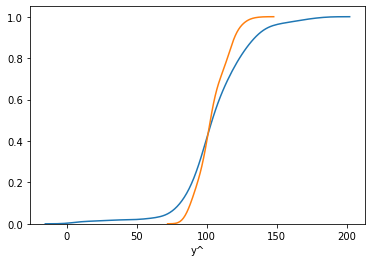

In [82]:
sns.distplot(aux['y'],kde_kws={'cumulative':True},hist=False)
sns.distplot(aux['y^'],kde_kws={'cumulative':True},hist=False)

In [83]:
import pickle

In [84]:
pickle.dump(modelo,open('knn_modelo.pickle','wb'))

In [ ]:
#modelo = pickle.load(open('knn_modelo.pickle','rb'))

In [85]:
aux.to_excel('seguridad_semanas.xlsx',index=False)